<a href="https://colab.research.google.com/github/RLWH/tensorflow-certification-labs/blob/main/C1_W2_Lab_1_beyond_hello_world.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A hands on lab with Computer Vision Example - Fashion MNIST

In [1]:
import tensorflow as tf

print(tf.__version__)

2.9.2


The Fashion MNIST dataset is a collection of grayscale 28x28 pixel clothing images. Each image is associated with a label as shown in this table⁉

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
This dataset is available directly in the tf.keras.datasets API and you load it like this:

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

Calling `load_data()` on this object will give us two tuples with two lists each. 

These will be the training and testing values for the graphics that contain the clothing items and their labels. 

In [3]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


## Previewing the values and images

What does these values look like?

Let's print a training image in: 
- As an image
- A numpy array, and a training label to see. 

Experiment with different indices in the array. 

For example, take a look at index `42`. That's a different boot than the one at index `0`

In [4]:
import numpy as np
import matplotlib.pyplot as plt

LABEL: 9

IAMGE PIXEL ARRAY: 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

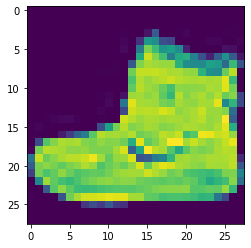

In [5]:
# Select an index (between 0 to 59999)
index = 0

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIAMGE PIXEL ARRAY: \n {training_images[index]}')

# Visualise the image
plt.imshow(training_images[index])

We can notice that all of the values in the number are between 0 and 255. 

If we are training a neural network, especially in image processing, for various reasons it will usually learn better if we scale all values to between 0 and 1. 

This process is called normalisation. 

We can do this easily in Python. 

In [6]:
# Normalise the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images / 255.0

LABEL: 9
IMAGE PIXEL ARRAY [[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.   

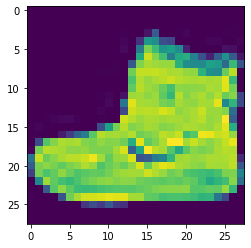

In [7]:
# Let's print out the preview again

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'IMAGE PIXEL ARRAY {training_images[index]}')

plt.imshow(training_images[index])

# Design the model

In [8]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now:

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:
```
if x > 0: 
  return x

else: 
  return 0
```
In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. 

When applied to model outputs, you can think of the scaled values as the probability for that class. 

For example, in your classification model which has `10` units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. 

You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.

Here we show some sample of the process. We start from an input matrix with below format: 

$$
\begin{align}
    \text{Input}=\begin{pmatrix}
    1.0 \\
    3.0 \\
    4.0 \\
    2.0
    \end{pmatrix}
\end{align}
$$

In [9]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')
print(f'input shape: {inputs.shape}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'Output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}') # Sum of outputs = 1.0

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
input shape: (1, 4)
Output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 0.9999999999999999
class with highest probability: 2


Here we have learnt some important function: 
- `tf.convert_to_tensor()`
- `tf.keras.activations.softmax()`
- `tf.reduce_sum()`
- `np.argmax()`

The next thing to do is to actually build the model. We do this by compiling it with an optimizer and loss function as before. 

We then train the model by calling `model.fit()`, which asks the program to fit the training data to our training labels. 

It will then figure out the relationship between the training data and its actual labels so in the future if we have inputs that looks like the training data, then it can predict what the label for that input is. 

In [10]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 4ms/step - loss: 0.4924 - accuracy: 0.8262
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3741 - accuracy: 0.8651
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3347 - accuracy: 0.8781
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3099 - accuracy: 0.8862
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2935 - accuracy: 0.8928


Once it's done training, we should see an accuracy value at the end of the epoch might look something like `0.9098`. 

This tells us that the neural network is about 91% accurate in classifying the training data. It figured out a pattern match between the image and the labels that worked 91% of the time. 

But how would it work with unseen data? That's why we have the test images and labels. We can call `model.evaluate()` with this test dataset as inputs and it will report back the loss and accuracy of the model. 

In [12]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3629 - accuracy: 0.8671


[0.36289358139038086, 0.8671000003814697]

We can expect the accuracy here to be about `0.88`, which means it was 88% accurate on the entire test set. 

As expected, it probably would not do as well with unseen data as it did with data it was trained on. 

# Exploration Exercises

## Exercise 1
For this first exercise run the below code: It creates a set of classifications for each of the test images, and then prints the first entry in the classifications. 

The output, after we run it is a list of numbers. 

In [13]:
classifications = model.predict(test_images)

# Print out the probabilities of each 10 classes
print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[6.0466959e-05 3.4579037e-09 2.6286195e-08 5.3213913e-09 3.9976430e-07 5.2346294e-03 2.5922844e-07 1.5798064e-02 1.0424937e-05 9.7889572e-01]


In [14]:
print(test_labels[0])

9


## Exercise 2: 

Let's now look at the layers in the model. 

Experiment with different values for the dense layer with 512 neurons. What different results do we get for loss, training time, etc?

What do you think that's the case?

In [17]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
                                
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4942
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3755
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3133
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[5.9099311e-05 8.8727541e-09 4.4838134e-07 7.4057930e-08 3.5461444e-06 8.0539696e-03 1.5930897e-05 1.1065377e-02 4.5454111e-05 9.8075610e-01]
9


## Exercise 3
What if we remove the `Flatten()` layer? What would happen? Why is it?

Answer:   
We will get an error about the shape of data.  

```
ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 10)
```

Although it may seem vague right now, but it reinfoces the rule of thumb that the first layer in the network should be the same shape as our data. 

Right now, our data is 28x28 images, and 28 layers of 28 neurons would be infeasible, so it makes more sense to 'flatten' that (28,28) into a (784, 1). 

Instead of writing all the code to handle that ourselves, we add the `Flatten()` layer at the beginning, and when the arrays are loaded into the model layer, they'll automatically be flattened for us. 

In [19]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
                                
print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

# Exercise 4: 
Consider the final (output) layers. Why are there 10 of them? What would happen if you had a different amount than 10? 

For example, training the network with 5. 
```
ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(32,) and logits.shape=(896, 5)
```

Answer:   
We will also get an error as it finds an unexpected value. 

Another rule of thumb - the number of neurons in the last layer should match the number of classes we are classifying for. In this case, it's the digits `0-9`, so there are `10` of them, hence we should have 10 neurons in our final layer. 

In [20]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(5, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)
                                
print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

## Exercise 7
Before we trained, we normalized the data, going from values that were 0-255 to values that were 0-1. 
What would be impact of removing that?


Answer: 
Loss is higher (0.49 vs 0.34), and the accracy is lower. 

In [23]:
fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = fmnist.load_data()

training_images=training_images # Experiment with removing this line
test_images=test_images # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 4.3407 - accuracy: 0.7594
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5440 - accuracy: 0.8142
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5135 - accuracy: 0.8244
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5143 - accuracy: 0.8273
Epoch 5/5
313/313 [==============================] - 1s 2ms/step
[3.8267918e-09 1.4567493e-11 2.4418361e-14 2.4270820e-12 1.8544399e-18 4.9641728e-03 3.9583518e-15 7.5926788e-02 9.7779711e-08 9.1910893e-01]
9


## Exercise 8

Eaarlier when we trained for extra epochs we had an issue where our loss might change. 

It might have taken a bit of time for us to wait for the training to do that, and how about if **we can stop the training when we reach a desired value?**. 
i.e. 60% accuracy might be enough for us, and if we reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs?

### How can we implement that?
We can use **callbacks**. 

In [25]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') >= 0.6):
            print("\nReached 60% accuracy so cancelling the training!")
            self.model.stop_training = True

callbacks = myCallback()

fmnist = tf.keras.datasets.fashion_mnist

(training_images, training_labels) ,  (test_images, test_labels) = \
    fmnist.load_data()

training_images=training_images/255.0
test_images=test_images/255.0

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images,
          training_labels,
          epochs=5,
          callbacks=[callbacks])

model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1866/1875 [============================>.] - ETA: 0s - loss: 0.4783 - accuracy: 0.8288
Reached 60% accuracy so cancelling the training!
313/313 [==============================] - 0s 1ms/step
[4.6285531e-05 7.5442591e-07 2.4704634e-06 4.6231862e-06 2.7931242e-06 2.5156660e-02 1.9901529e-06 1.6401333e-01 7.8933995e-04 8.0998170e-01]
9
